In [1]:
# Import library
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Import CVS files from great school.
def create_great_school_dataframe():
    school_profile = pd.read_csv('school_profile.csv')
    school_census = pd.read_csv('school_census.csv')

    dataset = school_profile.merge(school_census, on="gsId")
    dataset = dataset.dropna()
    return dataset

dataset = create_great_school_dataframe()
print('dataset size={}'.format(dataset.size))
dataset.head()

dataset size=352470


,gsId,name,type,gradeRange,enrollment,parentRating,gsRating,district,districtId,districtNCESId,...,Native American or Native Alaskan,Native Hawaiian or Other Pacific Islander,"White, non-Hispanic",actSatNumberParticipation,apCourseParticipation,apCoursePassed,freeAndReducedPriceLunch,idea,percentTeachersInFirstSecondYear,plan504
0,1,Alameda High School,public,9-12,1853,4,9,Alameda Unified School District,1,0601770,...,0.17,0.76,31.08,1071.0,46.8,885.0,18.16,8.8,7.9,1.5
1,2,Bay Farm,public,K-8,591,5,9,Alameda Unified School District,1,0601770,...,0.00,0.51,27.92,1071.0,46.8,885.0,6.26,10.1,4.2,0.0
2,4,Amelia Earhart Elementary School,public,K-5,622,5,9,Alameda Unified School District,1,0601770,...,0.16,0.16,26.21,1071.0,46.8,885.0,7.40,8.5,11.1,1.7
3,5,Edison Elementary School,public,K-5,478,4,9,Alameda Unified School District,1,0601770,...,0.42,0.00,57.11,1071.0,46.8,885.0,11.30,8.4,0.0,0.0
4,6,Encinal Junior/Senior High,public,6-12,1336,4,6,Alameda Unified School District,1,0601770,...,0.30,1.42,21.78,178.0,46.8,885.0,40.34,10.9,1.8,2.0


In [3]:
# Clean up the dataset. Only keeps the columns we are interested in
features = ['Asian',
            'Black, non-Hispanic',
            'Hispanic',
            'Multiracial',
            'Native American or Native Alaskan',
            'Native Hawaiian or Other Pacific Islander',
            'White, non-Hispanic',
            'actSatNumberParticipation',
            'apCourseParticipation',
            'apCoursePassed',
            'freeAndReducedPriceLunch',
            'percentTeachersInFirstSecondYear']
labels = ['gsRating']

dataset = dataset[features + labels]

In [4]:
# Splits training and test set.
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

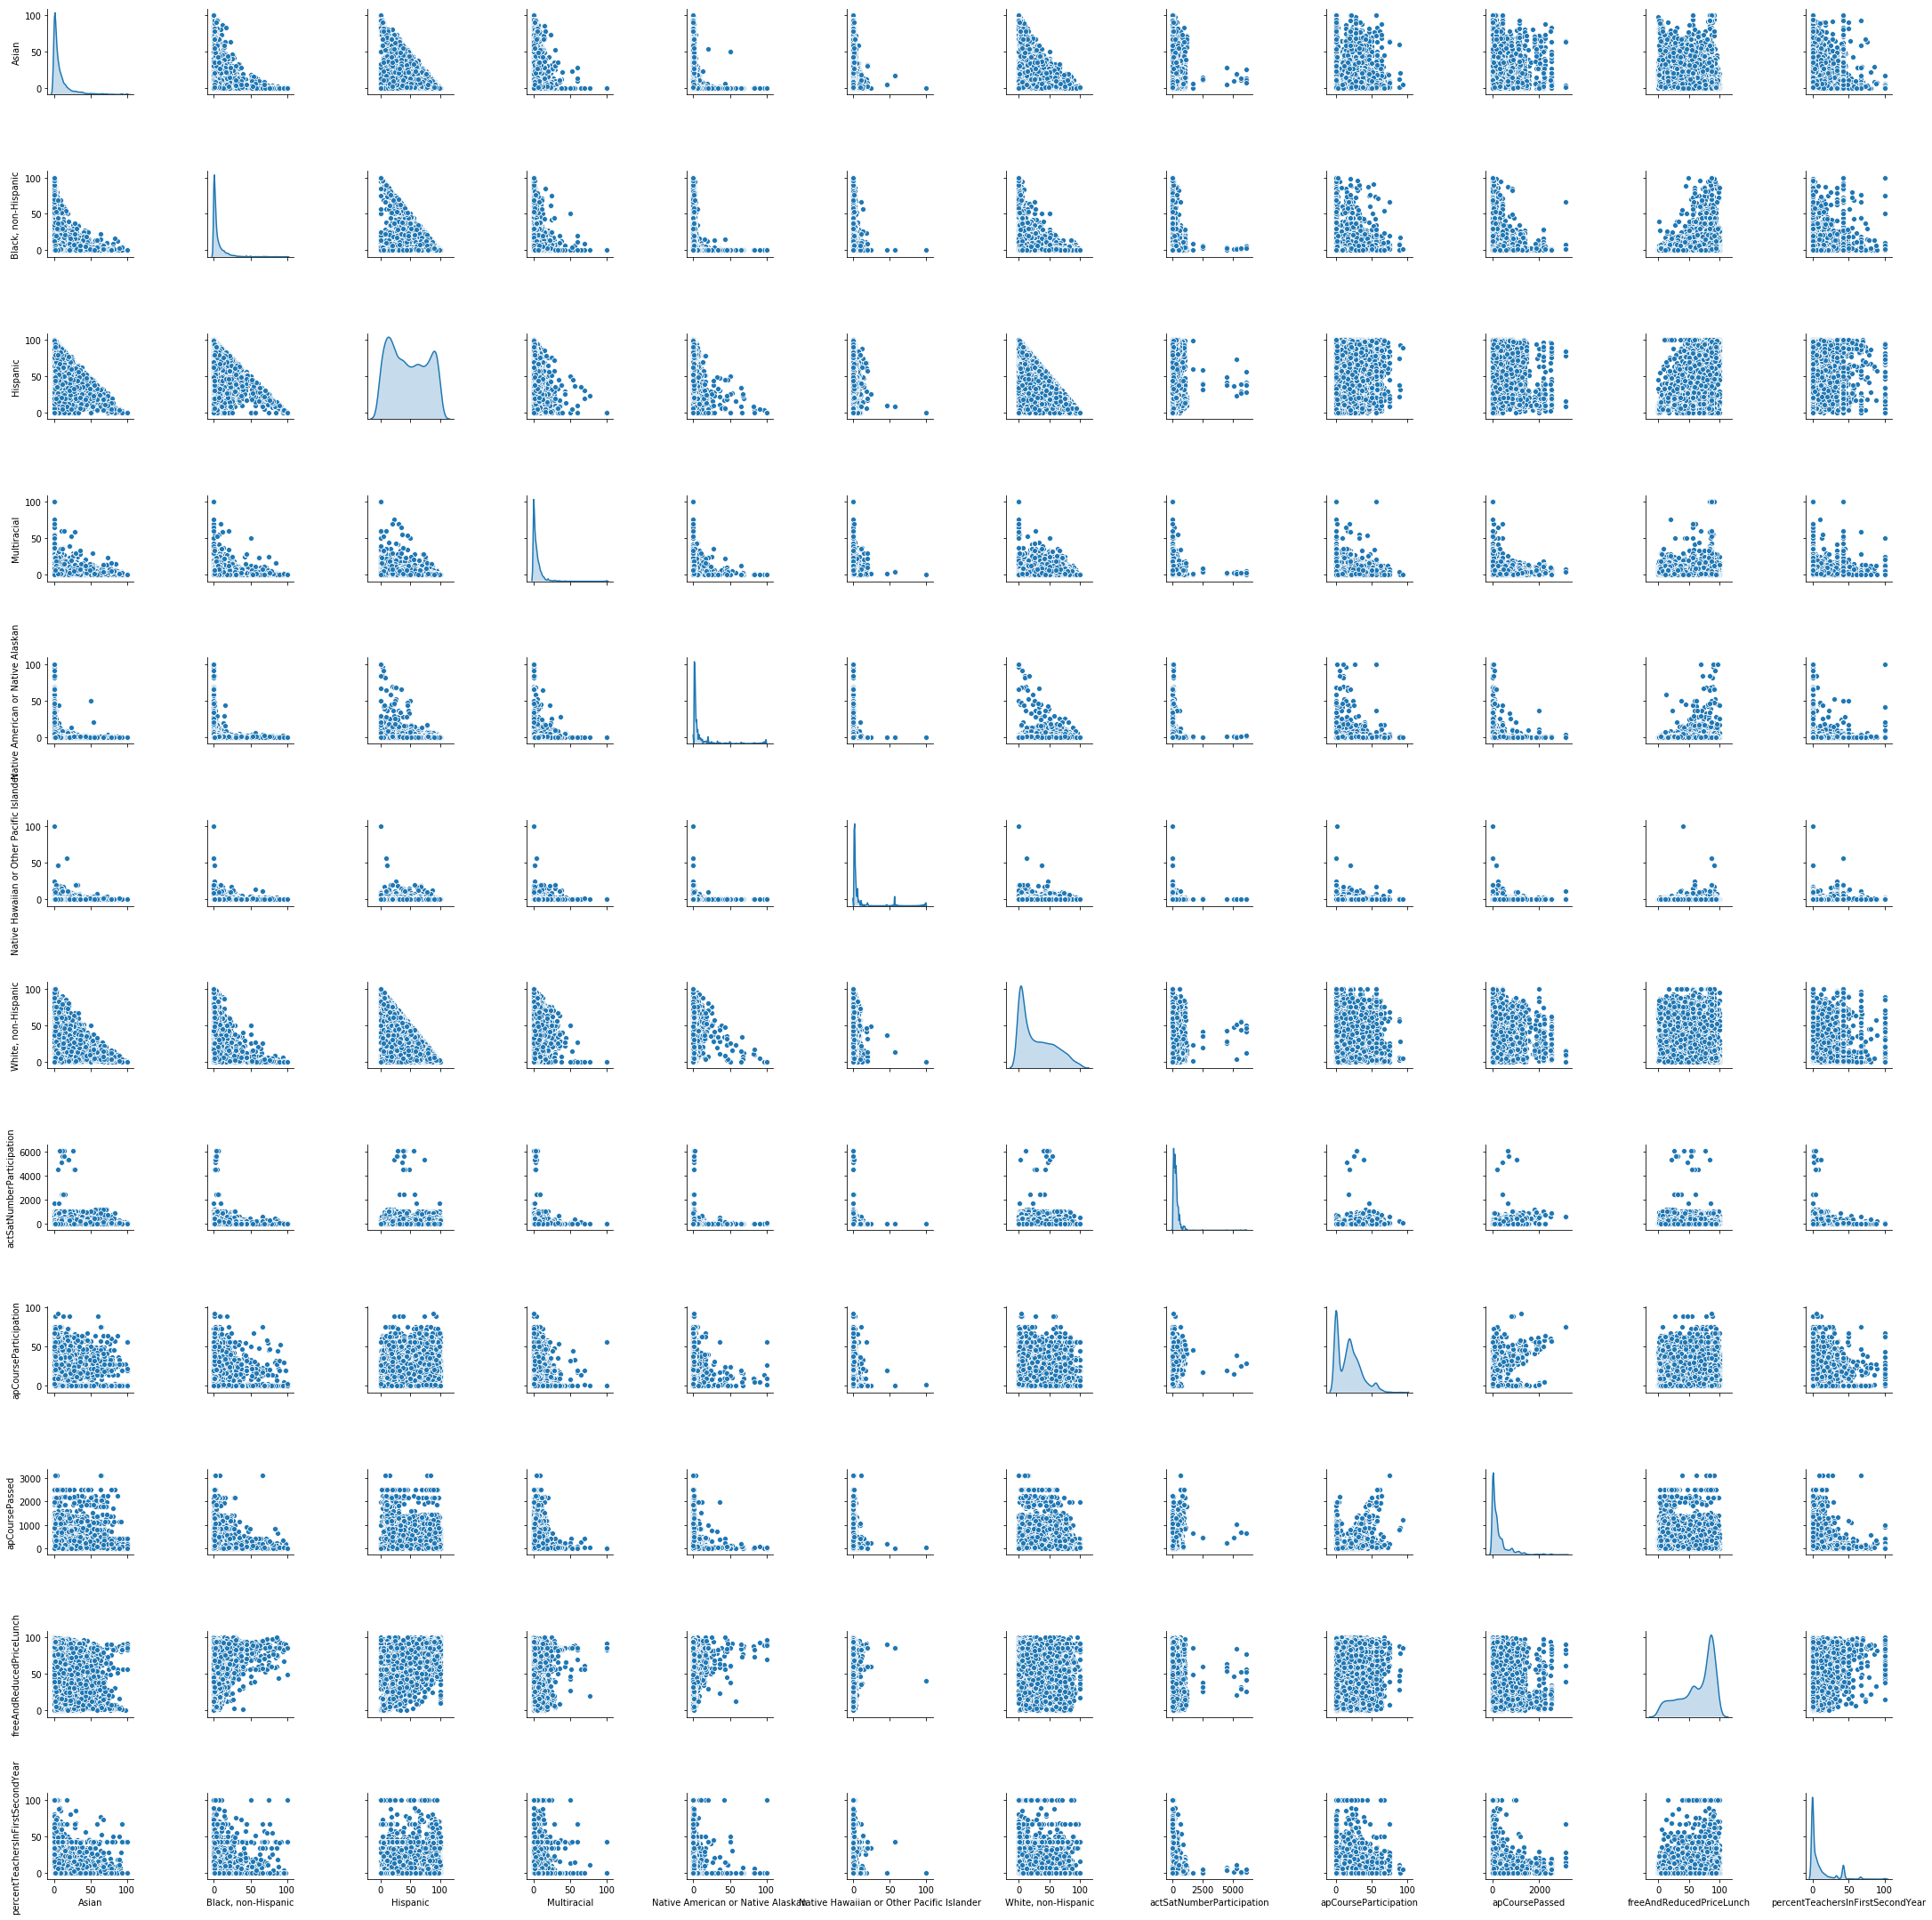

In [5]:
# Inspect the data
sns.pairplot(train_dataset[features], diag_kind="kde")
plt.show()

In [6]:
# Examine the overall statistics in the training set
train_stats = train_dataset.describe()
train_stats.pop(labels[0])
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Asian,9096.0,9.956835,15.762153,0.0,0.9700,4.00,11.320200,100.0
"Black, non-Hispanic",9096.0,6.542075,11.880558,0.0,0.6300,2.28,7.230000,100.0
Hispanic,9096.0,47.207175,31.081135,0.0,18.7475,44.64,75.540625,100.0
Multiracial,9096.0,4.874201,8.113686,0.0,0.6100,2.61,6.230000,100.0
Native American or Native Alaskan,9096.0,1.063030,4.892030,0.0,0.0000,0.20,0.600000,100.0
Native Hawaiian or Other Pacific Islander,9096.0,0.836771,3.867065,0.0,0.0000,0.15,0.580000,100.0
"White, non-Hispanic",9096.0,29.520035,27.390224,0.0,4.6475,21.10,50.305000,100.0
actSatNumberParticipation,9096.0,126.011214,285.745911,0.0,0.0000,6.00,186.000000,6081.0
apCourseParticipation,9096.0,18.363511,16.221786,0.0,1.5000,17.95,28.000000,93.1
apCoursePassed,9096.0,275.535070,383.866590,0.0,34.0000,142.00,340.000000,3121.0


In [7]:
# Creates labels to predict. In this case, the Great School score
train_labels = train_dataset.pop(labels[0])
test_labels = test_dataset.pop(labels[0])

In [8]:
# Normalize the training and test data. Otherwise it is difficult to train.
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [9]:
# Build the Neural Network model
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

model = build_model()

# Inspects the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Try to model and test our dataset
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.15035835],
       [ 0.35037714],
       [-0.18377149],
       [ 0.40164515],
       [-0.21905047],
       [ 0.38977146],
       [ 0.8442563 ],
       [-0.01619002],
       [ 0.15744609],
       [ 0.31564987]], dtype=float32)

In [11]:
# Train the model.
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


........................

In [12]:
# Visualize the training history
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
19,3.508878,1.471409,3.508879,3.804302,1.519604,3.804302,19
20,3.517732,1.473451,3.517733,3.765133,1.504830,3.765133,20
21,3.498645,1.469401,3.498647,3.842790,1.543769,3.842789,21
22,3.505020,1.469557,3.505021,3.734924,1.507037,3.734924,22
23,3.498461,1.469979,3.498461,3.748889,1.509595,3.748888,23


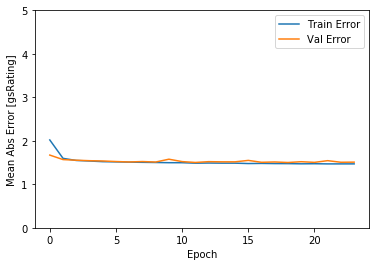

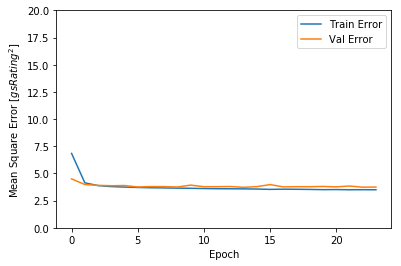

In [13]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [{}]'.format(labels[0]))
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
             label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [${}^2$]'.format(labels[0]))
    plt.plot(hist['epoch'], hist['mean_squared_error'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
             label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()


plot_history(history)

In [14]:
# Let's see how well the model generalizes by using the test set, which we did not use when training the model.
# This tells us how well we can expect the model to predict when we use it in the real world.
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} {}".format(mae, labels[0]))

Testing set Mean Abs Error:  1.51 gsRating


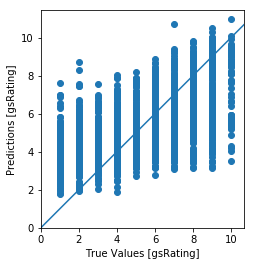

In [15]:
# Finally, predict rsRating values using data in the testing set:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [{}]'.format(labels[0]))
plt.ylabel('Predictions [{}]'.format(labels[0]))
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

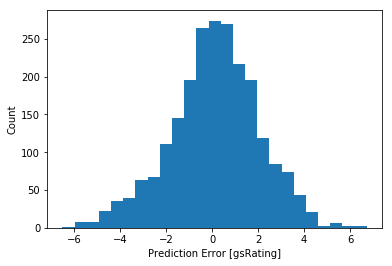

In [16]:
# Let's take a look at the error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [{}]".format(labels[0]))
_ = plt.ylabel("Count")